# Modelling Libraries

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


---
## Generation of random time series

In [3]:
start_date = pd.Timestamp('2022-01-01')
end_date = pd.Timestamp('2022-12-31')

ts = on.generators.random_walk().generate(start=start_date, end=end_date)
ts = ts.astype(np.float32)

---
## Models

- [x] Darts
- [x] Scikit-learn API compatible regressor
- [ ] GluonTS
- [ ] Kats
- [ ] Custom PyTorch
- [ ] Custom TensorFlow

## Darts models

In [4]:
from darts.models import BlockRNNModel

In [5]:
model = on.Model(BlockRNNModel,
                 input_chunk_length=12,
                 output_chunk_length=6,
                 n_rnn_layers=2,
                 n_epochs=50
                 )
model.fit(ts)
model.predict(5)

darts.models.forecasting.torch_forecasting_model INFO  Train dataset contains 348 samples.


darts.models.forecasting.torch_forecasting_model INFO  Time series values are 32-bits; casting model to float32.


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs



  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 2.0 K 
4 | fc            | Sequential       | 156   
---------------------------------------------------
2.2 K     Trainable params
0         Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)


Training: |                                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


GPU available: True (mps), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


Predicting: |                                                           | 0/? [00:00<?, ?it/s]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[12.925143 ]],

       [[13.1744175]],

       [[13.820713 ]],

       [[12.325284 ]],

       [[12.85242  ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Scikit-learn API compatible models

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
model = on.Model(MLPRegressor,
                 lags=30)
model.fit(ts)
model.predict(5)

/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[31.41836973]],

       [[30.42709606]],

       [[30.61009553]],

       [[30.309712  ]],

       [[29.84004834]]])
Coordinates:
  * time       (time) datetime64[ns] 2023-01-01 2023-01-02 ... 2023-01-05
  * component  (component) object 'pred'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Multi series models skforecast

/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklea

/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/sklea

<Axes: xlabel='time'>

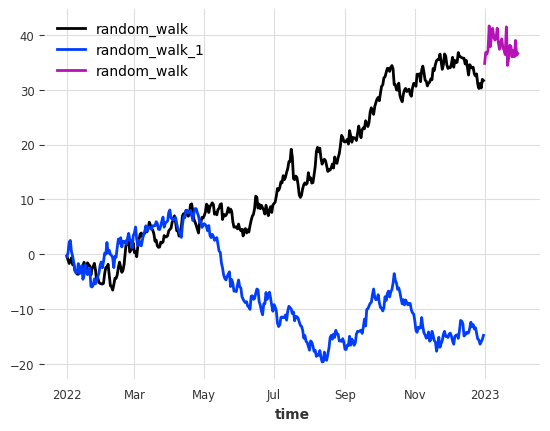

In [8]:
from darts.datasets import EnergyDataset

ts2 = on.generators.random_walk().generate(start=start_date, end=end_date)
ts2 = ts2.astype(np.float32)

model = on.Model(MLPRegressor,
                 level='random_walk',
                 steps=30,
                 lags=30)

ts_multi = ts.concatenate(ts2, axis=1)

ts_multi.plot()

model.fit(ts=ts_multi)
prediction = model.predict(n=30)

prediction.plot()